In [25]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs import project_config
from configs.RecursiveVPSDE.LSTM_4DLorenz.recursive_LSTM_PostMeanScore_4DLorenz_T256_H05_tl_110data import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
num_paths = 10952

In [27]:
def get_drift_files(config):
    ts_type = f"{config.ndims}DLnz"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_dir = project_config.ROOT_DIR + f"experiments/results/"
    global_files = []
    true_files = []
    local_files = []
    for file in os.listdir(root_dir):
        print(((f"{config.forcing_const}FConst").replace(".","")))
        if "IIDNadaraya" in file and ts_type in file and include in file and ((f"{config.forcing_const}FConst").replace(".","") in file):
            if "global" in file:
                global_files.append(root_dir+file)
            elif "true" in file:
                true_files.append(root_dir+file)
            elif "local" in file:
                local_files.append(root_dir+file)
    assert len(global_files)>0, "No global files found"
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(global_files) == len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[3][:-2]
        return float("0." + match)
    global_files = sorted(global_files, key=extract_bw_number)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in global_files]
    return global_files, true_files, local_files, bws

In [28]:
config = get_config()
_, true_files, local_files, bws = get_drift_files(config=config)
local_files

10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
10FConst
1

['/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f4DLnz_DriftTrack_00001bw_10952NPaths_00t0_3906e-03dT_10FConst_local_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f4DLnz_DriftTrack_0000126bw_10952NPaths_00t0_3906e-03dT_10FConst_local_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f4DLnz_DriftTrack_0000159bw_10952NPaths_00t0_3906e-03dT_10FConst_local_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f4DLnz_DriftTrack_0000201bw_10952NPaths_00t0_3906e-03dT_10FConst_local_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f4DLnz_DriftTrack_0000254bw_10952NPaths_00t0_3906e-03dT_10FConst_local_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f4DLnz_DriftTrack_0000321bw_10952NPaths_00t0_3906e-03dT_10FConst_local_s

0.05991216588006173 0.0 inf 0


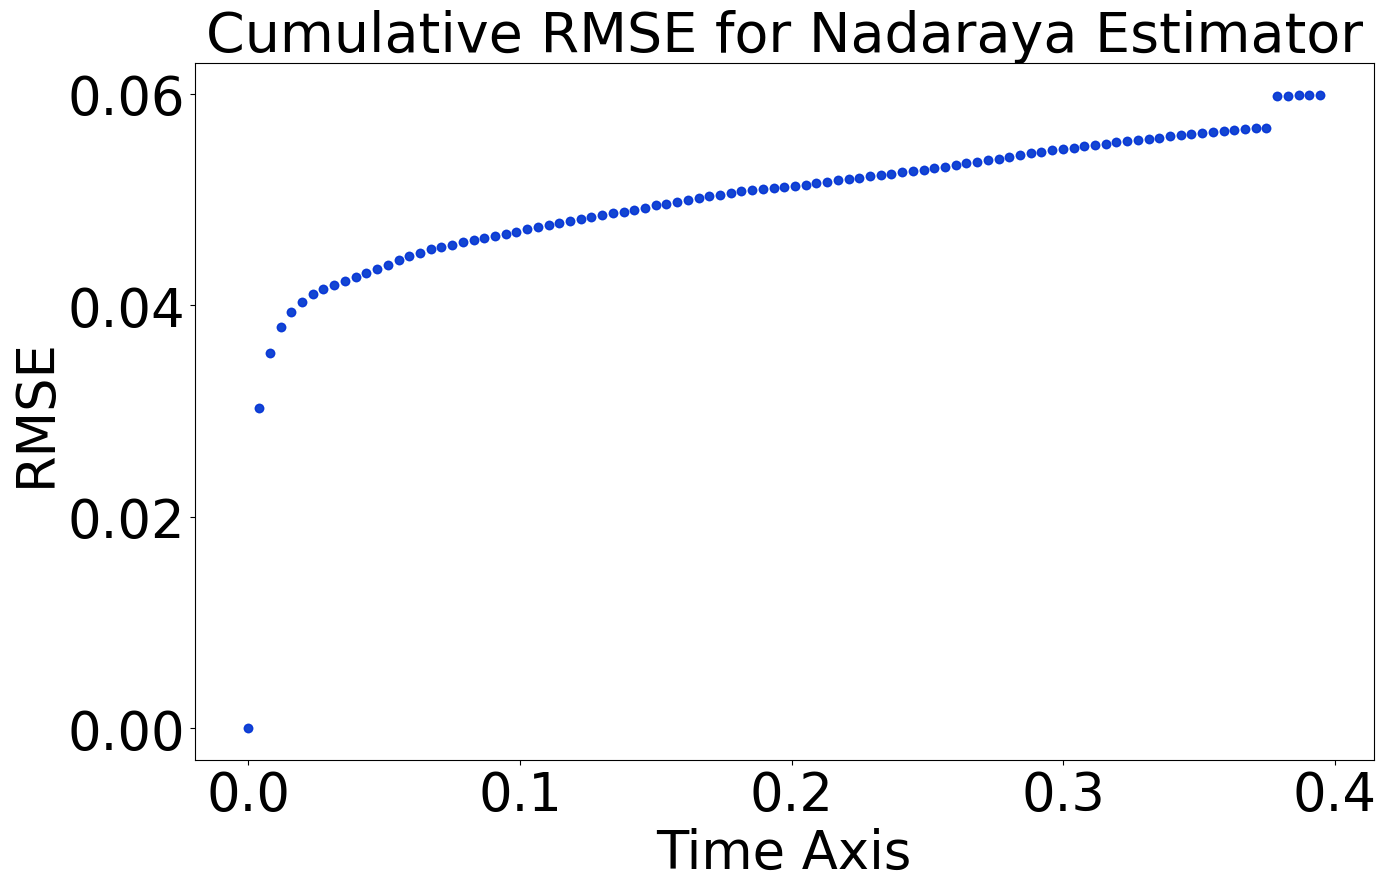

Final time cumulative RMSE local-time error 0.05991216588006173 with IQR ((0.05991216588006173, 0.05991216588006173))at bw 1e-05 for 1.0FConst

0.05991216588006173 0.0 0.05991216588006173 1
0.06016903425863394 0.0 0.05991216588006173 2
0.060243655199958036 0.0 0.05991216588006173 3
0.06099718905133498 0.0 0.05991216588006173 4
0.06207525107386116 0.0 0.05991216588006173 5
0.07214807437387886 0.0 0.05991216588006173 6


In [29]:
curr_rmse = np.inf
toSave = True
i = 0
for file in zip(*[true_files, local_files, bws]):
    bw = file[-1]
    all_true_states = np.load(file[0])/np.sqrt(config.deltaT)
    all_local_states = np.load(file[1])/np.sqrt(config.deltaT)
    if (len(all_true_states.shape) == len(all_local_states.shape) == 4):
        all_local_errors = np.cumsum(np.mean(np.power(all_true_states- all_local_states,2), axis=(1,3)), axis=-1)/np.arange(1, all_local_states.shape[2]+1)
        total_local_errors = np.mean(np.sqrt(all_local_errors), axis=0)
        total_local_errors_minq = np.quantile(np.sqrt(all_local_errors), axis=0,q=0.025)
        total_local_errors_maxq = np.quantile(np.sqrt(all_local_errors), axis=0,q=0.975)
        print(total_local_errors[-1], total_local_errors_maxq[-1]-total_local_errors_minq[-1], curr_rmse, i)
        i += 1
        if total_local_errors[-1]  < curr_rmse:
            miny = total_local_errors-total_local_errors_minq
            miny[miny < 0.] = 0.
            maxy = total_local_errors_maxq-total_local_errors
            maxy[maxy < 0.] = 0.
            time_steps = np.linspace(config.t0,config.deltaT*total_local_errors.shape[0],total_local_errors.shape[0])
            curr_rmse = total_local_errors[-1]
            fig, ax = plt.subplots(figsize=(14,9))
            ax.scatter(np.linspace(config.t0,config.deltaT*total_local_errors.shape[0],total_local_errors.shape[0]), total_local_errors)
            plt.errorbar(time_steps,total_local_errors,yerr=[miny, maxy],xerr=None, fmt='o', color="blue", alpha=0.4)
            ax.set_title(f"Cumulative RMSE for Nadaraya Estimator",fontsize=40)
            ax.set_ylabel("RMSE", fontsize=38)
            ax.set_xlabel("Time Axis", fontsize=38)
            ax.tick_params(labelsize=38)
            plt.tight_layout()
            if toSave:
                plt.savefig((f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModelPresentationImages/IIDNadaraya_4DLnz_DriftTrack_{round(bw, 6)}bw_{config.forcing_const}FConst").replace(".", "")+".png")
            plt.show()
            plt.close()
            print(f"Final time cumulative RMSE local-time error {total_local_errors[-1]} with IQR ({total_local_errors_minq[-1], total_local_errors_maxq[-1]})at bw {bw} for {config.forcing_const}FConst\n")